In [1]:
!pip3 install tensorflow-data-validation[visualization]
!sudo apt-get install libsnappy-dev
!sudo pip3 install python-snappy
!pip3 install apache-beam[interactive]

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  libsnappy1v5
The following NEW packages will be installed:
  libsnappy-dev libsnappy1v5
0 upgraded, 2 newly installed, 0 to remove and 0 not upgraded.
Need to get 117 kB of archives.
After this operation, 254 kB of additional disk space will be used.
Do you want to continue? [Y/n] ^C
  Using cached https://files.pythonhosted.org/packages/45/35/65d9f8cc537129894b4b32647d80212d1fa342877581c5b8a69872cea8be/python-snappy-0.5.4.tar.gz
  Running setup.py bdist_wheel for python-snappy ... error
  Complete output from command /usr/bin/python3 -u -c "import setuptools, tokenize;__file__='/tmp/pip-build-dc6ijv49/python-snappy/setup.py';f=getattr(tokenize, 'open', open)(__file__);code=f.read().replace('\r\n', '\n');f.close();exec(compile(code, __file__, 'exec'))" bdist_wheel -d /tmp/tmpnyfvd_f1pip-wheel- --python-tag cp35:
  /usr/lib/python3.5/dist

In [2]:
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
from tensorflow_datasets.image.pathVQA import Pathvqa
pathvqa = Pathvqa()

ds = tfds.load('pathvqa', download_and_prepare_kwargs={
    'download_config' : tfds.download.DownloadConfig(manual_dir='gs://bme590/roujia/pathVQARW', 
                                                     compute_stats='skip')
})

Shuffling and writing examples to /home/jupyter/tensorflow_datasets/pathvqa/0.1.0.incomplete10AU7F/pathvqa-train.tfrecord


Shuffling and writing examples to /home/jupyter/tensorflow_datasets/pathvqa/0.1.0.incomplete10AU7F/pathvqa-test.tfrecord


Shuffling and writing examples to /home/jupyter/tensorflow_datasets/pathvqa/0.1.0.incomplete10AU7F/pathvqa-validation.tfrecord


Dataset pathvqa downloaded and prepared to /home/jupyter/tensorflow_datasets/pathvqa/0.1.0. Subsequent calls will reuse this data.


In [10]:
ds

{'test': <PrefetchDataset shapes: {answer: (None,), image: (None,), image_shape: (None,), question: (None,)}, types: {answer: tf.string, image: tf.uint8, image_shape: tf.int32, question: tf.string}>,
 'train': <PrefetchDataset shapes: {answer: (None,), image: (None,), image_shape: (None,), question: (None,)}, types: {answer: tf.string, image: tf.uint8, image_shape: tf.int32, question: tf.string}>,
 'validation': <PrefetchDataset shapes: {answer: (None,), image: (None,), image_shape: (None,), question: (None,)}, types: {answer: tf.string, image: tf.uint8, image_shape: tf.int32, question: tf.string}>}

In [11]:
ds_iter = iter(ds['test'])
ds_val = next(ds_iter)
imageArray = ds_val["image"]
shapeArray = ds_val["image_shape"]
questions = ds_val["question"]
answers = ds_val["answer"]
print(imageArray)
print(shapeArray)
print(questions)
print(answers)

tf.Tensor([255 255 255 ...   1   1   1], shape=(446988,), dtype=uint8)
tf.Tensor([386 386   3], shape=(3,), dtype=int32)
tf.Tensor(
[b'Where are multiple hypointense lesions noted?'
 b'What are multiple hypointense lesions noted within?'
 b'Are multiple hypointense lesions noted within the white matter?'
 b'Are stir saggitals noted within the white matter?'], shape=(4,), dtype=string)
tf.Tensor([b'within the white matter' b'noted the white matter' b'yes' b'no'], shape=(4,), dtype=string)


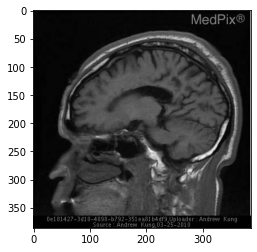

In [12]:
image = pathvqa.reshape_image(ds_val)
plt.imshow(image)